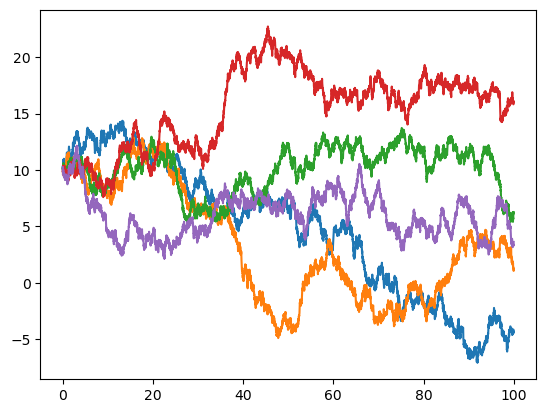

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

N = 5
T = 100
D = 1
dt = 0.01
x0 = 10
times = np.arange(0, T, dt)

def a(x,t):
    return 0

def sigma(x,t):
    return sqrt(D)


def run_stochastic(n):
    x = x0 * np.ones( (int(T/dt),n) )
    for i, t in enumerate(times):
        z = np.random.normal(0,1, (n,))
        dB = sqrt(dt) * z
        x[i] = x[i-1] + a(x[i-1], t) * dt * np.ones((n,)) + sigma(x[i-1],t) * dB * np.ones((n,))
    return x

plt.plot(times, run_stochastic(5))
plt.show()


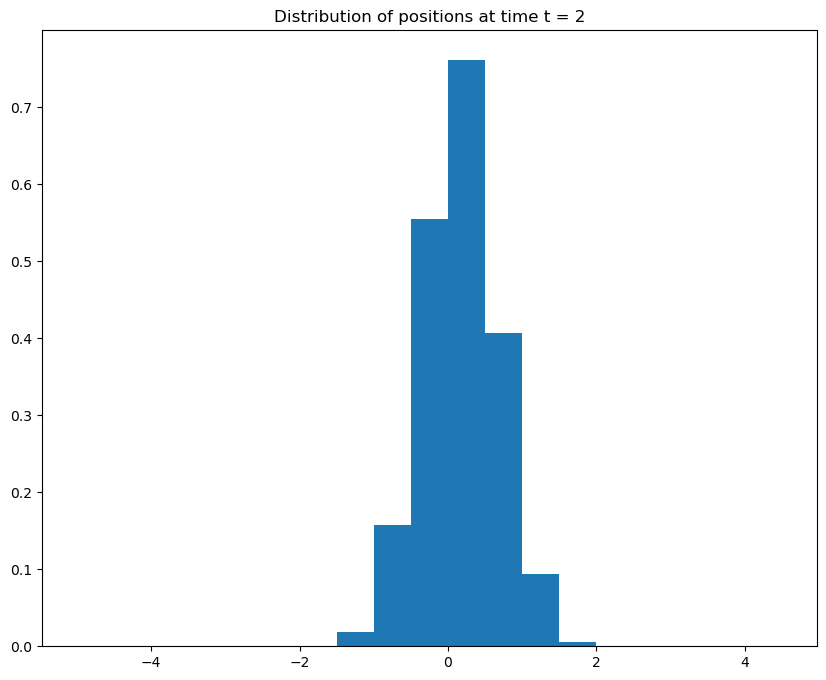

0.24800287021359257


In [93]:
from scipy import stats

ft = 2
xt = run_stochastic(10000)[int(ft/dt)]

fig, ax = plt.subplots(figsize=(10,8))
ax.hist(xt, bins=np.arange(-5, 5, 0.5), density = True)
ax.set_title("Distribution of positions at time t = " + str(ft))
plt.show()

res = stats.norm.fit(xt)
print(res[1]**2)